# Carrot diseases prediction

## Table of contents

1. About the dataset

2. Importing libraries

3. Exploratory data analysis

4. Data preprocessing

5. Model building

6. Model evaluation



##About the dataset:

Dataset include images of 'Life_spot' and 'Healthy' carrot leaves. The images are collected from various internet sources.

In [ ]:
! pip install split-folders --quiet

## Importing necessary libraries

1. Using pandas library to load dataset and data processing

2. Numpy to work with arrays and matrices

3. Matplotlib for data visualization

4. Using splitfolders , splitting the data into train, test and validation dataset

5. Using tensorflow and keras libraries for model building and training.


In [ ]:
import pandas as pd
import numpy as np
#import splitfolders
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

* Before exploring the dataset splitting the data into training , testing and validation dataset. Since I am using tensorflows "image_dataset_from_directory" to load the images, they donot have an option to split the dataset into three directories, they provide only train and validation split. However, I would like to have train, test and validation split. And using splitfolder function to do the same.

* The splifolders function splits the data with respect to the ratios. Therefore it takes the input dataset directory , the destination directory to save the splitted datasets and the ratio of the split as parameters.

* Here, by passing the dataset directory into splitfolder function, splitting the data into train, test and validation dataset providing the ratio as 80% , 10% and 10% respectively and storing it in a new folder (dataset- foldername).

In [ ]:
splitfolders.ratio("/content/drive/MyDrive/thesis_crop_dis_pre/carrot", output="/content/drive/MyDrive/thesis_crop_dis_pre/carrot/dataset_carrot",
     ratio=(.8, .1, .1))

Copying files: 91 files [00:43,  2.09 files/s]


Image size and batch size are assigned with default values

In [ ]:
image_size = (256, 256)
batch_size = 32

In [ ]:
df_train = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/thesis_crop_dis_pre/carrot/dataset_carrot/train',
    labels='inferred',
    label_mode ='int',
    class_names=None,
    color_mode ='rgb',
    batch_size = batch_size,
    image_size = image_size,
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
)

Found 72 files belonging to 2 classes.


In [ ]:
len(df_train)

3

In [ ]:
dir(df_train)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__debug_string__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_apply_debug_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_common_args',
 '_consumers',
 '_deferred_dependencies',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_drop_remainder',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_get_legacy_saved_model_children',
 '_graph',
 '_graph

In [ ]:
classes = df_train.class_names
classes

['Healthy', 'Life_spot']

In [ ]:
len(classes)

2

In [ ]:
len(df_train)

3

In [ ]:
for image, label in df_train.take(2):
  print(image.numpy())
  print(label.numpy())

[[[[7.75761719e+01 1.20576172e+02 1.01576172e+02]
   [1.40686035e+02 1.81998535e+02 1.63842285e+02]
   [1.54396729e+02 1.94584229e+02 1.76584229e+02]
   ...
   [1.54171387e+02 1.89171387e+02 1.68358887e+02]
   [1.54986572e+02 1.89830322e+02 1.70299072e+02]
   [1.55037598e+02 1.89037598e+02 1.72037598e+02]]

  [[1.29031006e+02 1.72031006e+02 1.53031006e+02]
   [1.51292969e+02 1.92605469e+02 1.74449219e+02]
   [1.51622314e+02 1.91809814e+02 1.73809814e+02]
   ...
   [1.53331299e+02 1.88331299e+02 1.67518799e+02]
   [1.54408691e+02 1.89252441e+02 1.69721191e+02]
   [1.54881592e+02 1.88881592e+02 1.71881592e+02]]

  [[1.49710938e+02 1.92710938e+02 1.73710938e+02]
   [1.48254639e+02 1.89567139e+02 1.71410889e+02]
   [1.50101318e+02 1.90288818e+02 1.72288818e+02]
   ...
   [1.50882568e+02 1.85882568e+02 1.65070068e+02]
   [1.52296875e+02 1.87140625e+02 1.67609375e+02]
   [1.52730713e+02 1.86730713e+02 1.69730713e+02]]

  ...

  [[4.82150879e+01 8.32150879e+01 7.62150879e+01]
   [6.89062500e+

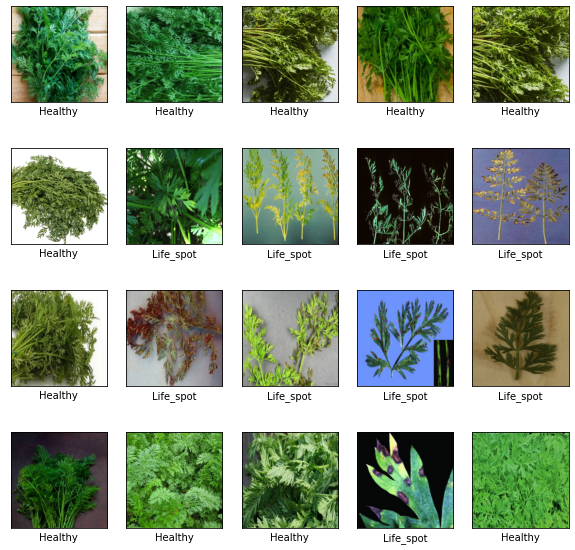

In [ ]:
for image, label in df_train.take(1):
  plt.figure(figsize=(10,10))
  for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image[i].numpy().astype('int'), cmap=plt.cm.binary)
    plt.xlabel(classes[label[i]])
  plt.show()

In [ ]:
df_vali = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/thesis_crop_dis_pre/carrot/dataset_carrot/val',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size= batch_size,
    image_size= image_size,
    shuffle=True,
)

Found 8 files belonging to 2 classes.


In [ ]:
df_test = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/thesis_crop_dis_pre/carrot/dataset_carrot/test',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size= batch_size,
    image_size= image_size,
    shuffle=True,)

Found 11 files belonging to 2 classes.


## Data preprocessing

Using tensorflows preprocessing layers

1. Resizing layers- used to change image length and widhth to (256,256)

2. Rescaling layers- to stanadradize the data

3. RandomZoom layers - to randomly zoom in or out on each axis of an image independently

In [ ]:
data_preprocessing = tf.keras.Sequential([

                                layers.experimental.preprocessing.Resizing(256,256),
                                layers.experimental.preprocessing.Rescaling(1./255, input_shape= (256,256,3)),
                                layers.experimental.preprocessing.RandomZoom(0.2)

                    ])

In [ ]:
data_augumentation = tf.keras.Sequential([
                                layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                layers.experimental.preprocessing.RandomRotation(0.2),

                    ])

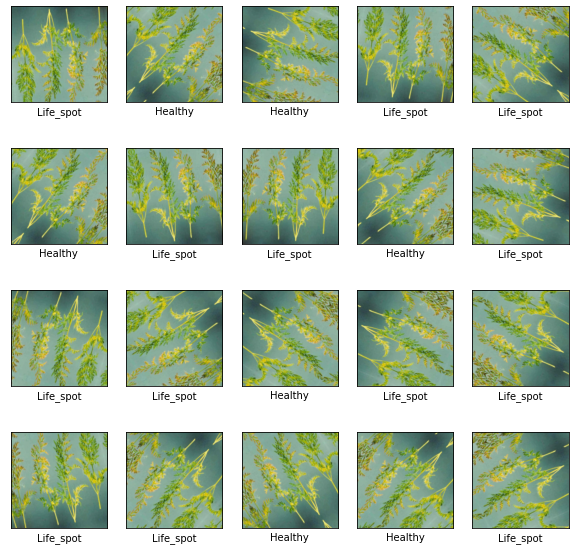

In [ ]:
for image, label in df_train.take(1):
  plt.figure(figsize=(10,10))
  for i in range(20):
    augmented_images = data_augumentation(image)
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(augmented_images[0].numpy().astype('int'), cmap=plt.cm.binary)
    plt.xlabel(classes[label[i]])
  plt.show()

## Model building

Checking different optimizers using function

In [ ]:
def check_opt(optimizers):

  model = models.Sequential([
    data_preprocessing,
    layers.Conv2D(filters=32, kernel_size= (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(64, activation='relu' ),
    layers.Dense(37, activation = 'softmax'),

    ])


  model.compile(optimizer= optimizers,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

  return model

In [ ]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

In [ ]:
train_acc = []
val_acc = []
train_loss =[]
val_loss = []

In [ ]:
for i in optimizers:
  model = check_opt(i)
  print('With optimizer:'+ i)


  history = model.fit(df_train, epochs= 5, batch_size = 32,validation_data= df_vali)

  train_acc.append(history.history['accuracy'][4])
  val_acc.append( history.history['val_accuracy'][4])

  train_loss.append(history.history['loss'][4])
  val_loss.append(history.history['val_loss'][4])

With optimizer:Adadelta
Epoch 1/5
3/3 [==============================] - 15s 1s/step - loss: 3.5079 - accuracy: 0.4167 - val_loss: 3.5147 - val_accuracy: 0.5000
Epoch 2/5
3/3 [==============================] - 1s 86ms/step - loss: 3.5034 - accuracy: 0.4306 - val_loss: 3.5114 - val_accuracy: 0.5000
Epoch 3/5
3/3 [==============================] - 1s 84ms/step - loss: 3.5000 - accuracy: 0.4167 - val_loss: 3.5080 - val_accuracy: 0.5000
Epoch 4/5
3/3 [==============================] - 1s 85ms/step - loss: 3.4992 - accuracy: 0.4306 - val_loss: 3.5048 - val_accuracy: 0.5000
Epoch 5/5
3/3 [==============================] - 1s 85ms/step - loss: 3.4941 - accuracy: 0.4722 - val_loss: 3.5015 - val_accuracy: 0.5000
With optimizer:Adagrad
Epoch 1/5
3/3 [==============================] - 2s 135ms/step - loss: 3.5848 - accuracy: 0.0000e+00 - val_loss: 3.5491 - val_accuracy: 0.0000e+00
Epoch 2/5
3/3 [==============================] - 1s 84ms/step - loss: 3.5422 - accuracy: 0.0139 - val_loss: 3.5046 - 

In [ ]:
data = {'Optimizers': ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD'], 'Training_accuracy': [train_acc[0],train_acc [1],train_acc [2],train_acc [3],train_acc [4]],
         'Training_loss': [train_loss[0],train_loss[1],train_loss[2],train_loss[3],train_loss[4]],
         'Validation_accuracy' : [val_acc[0],val_acc[1],val_acc[2],val_acc[3],val_acc[4]],

         'Validation_loss': [val_loss[0],val_loss[1],val_loss[2],val_loss[3],val_loss[4]],
                                                                                              }

df = pd.DataFrame(data)

In [ ]:
df

,Optimizers,Training_accuracy,Training_loss,Validation_accuracy,Validation_loss
0,Adadelta,0.472222,3.494104,0.5,3.501525
1,Adagrad,0.416667,3.382754,0.5,3.315003
2,Adam,0.861111,0.595817,0.5,0.859721
3,RMSprop,0.819444,0.565844,0.5,0.937859
4,SGD,0.388889,1.275838,0.5,2.114361


In [ ]:
model = models.Sequential([
    data_preprocessing,
    data_augumentation,
    layers.Conv2D(filters=32, kernel_size= (3, 3), activation='relu', input_shape=( 256, 256, 3)),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(64, activation='relu' ),
    layers.Dropout(0.5),
    layers.Dense(3, activation = 'softmax'),

])
model.build(input_shape = (32,256,256,3))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 84, 84, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 82, 82, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 27, 27, 64)         0         
 2D)                                                  

In [ ]:
model.compile(optimizer= 'Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

In [ ]:
early_stop = EarlyStopping(monitor= 'val_loss',patience = 3, restore_best_weights= True)
model_chk = ModelCheckpoint(filepath='/content/drive/MyDrive/thesis_crop_dis_pre/car_save_model.hdf5',monitor= 'val_loss',save_best_only= True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 3, factor = 0.1)

In [ ]:
history = model.fit(df_train, epochs= 30, batch_size = 32, validation_data= df_vali, callbacks = [early_stop,model_chk,lr_rate],verbose = 2)

Epoch 1/30
3/3 - 30s - loss: 0.9666 - accuracy: 0.3472 - val_loss: 0.7737 - val_accuracy: 0.5000 - lr: 0.0010 - 30s/epoch - 10s/step
Epoch 2/30
3/3 - 1s - loss: 0.8245 - accuracy: 0.4722 - val_loss: 0.6882 - val_accuracy: 0.6250 - lr: 0.0010 - 1s/epoch - 480ms/step
Epoch 3/30
3/3 - 1s - loss: 0.6786 - accuracy: 0.5833 - val_loss: 0.8504 - val_accuracy: 0.5000 - lr: 0.0010 - 1s/epoch - 442ms/step
Epoch 4/30
3/3 - 1s - loss: 0.7851 - accuracy: 0.4722 - val_loss: 0.7736 - val_accuracy: 0.5000 - lr: 0.0010 - 1s/epoch - 448ms/step
Epoch 5/30
3/3 - 1s - loss: 0.7088 - accuracy: 0.5556 - val_loss: 0.6844 - val_accuracy: 0.3750 - lr: 0.0010 - 1s/epoch - 466ms/step
Epoch 6/30
3/3 - 1s - loss: 0.6256 - accuracy: 0.8194 - val_loss: 0.6593 - val_accuracy: 0.6250 - lr: 0.0010 - 1s/epoch - 476ms/step
Epoch 7/30
3/3 - 1s - loss: 0.6166 - accuracy: 0.6806 - val_loss: 0.6401 - val_accuracy: 0.5000 - lr: 0.0010 - 1s/epoch - 465ms/step
Epoch 8/30
3/3 - 1s - loss: 0.5916 - accuracy: 0.7361 - val_loss: 0.6

## Model evaluation

Evaluating the model by comparing the accuracy and loss in training and validation dataset using callback function(history) and visualizing with matplotlib

In [ ]:
train_accu = history.history['accuracy']
val_accu = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0, 0.5, 'Loss')

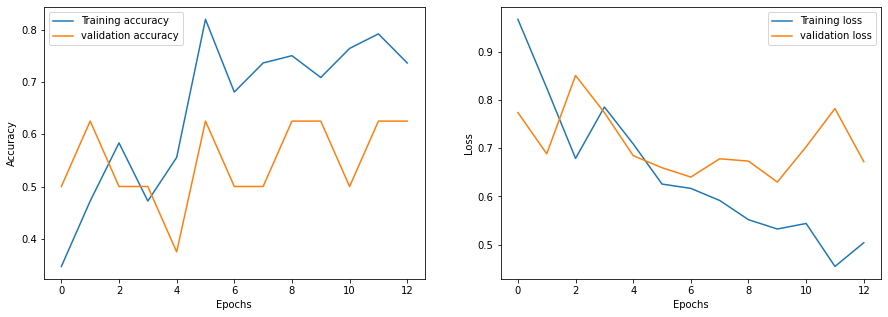

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(13),train_accu,label= 'Training accuracy')
plt.plot(range(13),val_accu,label = 'validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(range(13),train_loss,label= 'Training loss')
plt.plot(range(13),val_loss,label = 'validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
model.evaluate(df_test)

1/1 [==============================] - 3s 3s/step - loss: 0.4687 - accuracy: 0.8182


[0.4686933755874634, 0.8181818127632141]

actual label Life_spot
predicted_label Life_spot


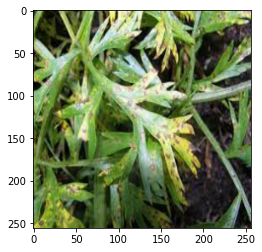

In [ ]:
for image, label in df_test.take(1):
  plt.imshow(image[1].numpy().astype('int'))
  print('actual label', classes[label[1]])

  prediction = model.predict(image)
  print('predicted_label',classes[np.argmax(prediction[1])] )


In [ ]:
save_path = '/content/drive/MyDrive/thesis_crop_dis_pre/car_save_model.h5'
model.save(save_path)

model = keras.models.load_model(save_path)